In [1]:
# autoreload
%load_ext autoreload
%autoreload 2


In [2]:
from utils.pianoroll import PianoRoll
import matplotlib.pyplot as plt
import numpy as np

In [167]:
pr = PianoRoll.from_midi('../../log/ema_0.9999_2700000/6.mid')

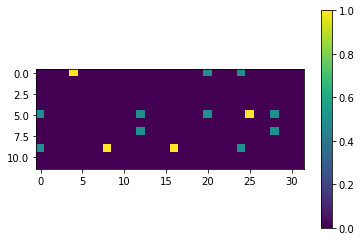

In [168]:
ch = (pr.to_tensor(chromagram=True)>0).float()
ch /= (ch.sum(dim=1, keepdim=True)+1e-9)
plt.imshow(ch[:32].t())
plt.colorbar()

In [169]:
def sim_mat(x):
    return x @ x.t() 
s = sim_mat(ch)

In [170]:
def harmonic_mean(x):
    return 1/(1/(x)).mean(dim=1)
fitness = s.mean(dim=1)

tensor(0., dtype=torch.float64) tensor(6.3115, dtype=torch.float64)


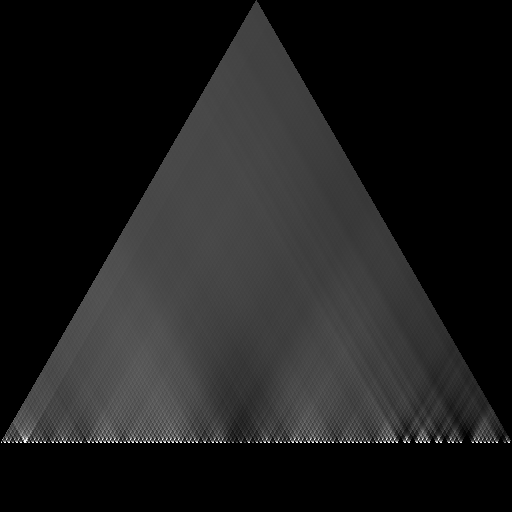

In [171]:
n = len(fitness)
scape = np.zeros((n, n))
scape[0] = fitness**0.5
for l in range(n):
    for m in range(n-l):
        scape[l, m] = scape[l-1, m] + fitness[m+l]**0.5
for l in range(n):
    scape[l] = (scape[l]/(l+1))**2

import io
import PIL.Image
import torchvision.transforms.functional as TF
import torch
def fig_to_pil(fig):
    plt.axis('off')
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    buf = io.BytesIO()
    
    fig.savefig(buf,pad_inches =0)
    buf.seek(0)
    return PIL.Image.open(buf)

#(1.23205 | -1.23205 | 1.73205 -0.366025 | -1.36603 | 1.36603)
scape = TF.to_tensor(scape)/0.009
print(scape.min(), scape.max())
scape = torch.cat([scape,scape,scape])
img = TF.to_pil_image((scape).clamp(0,1))
img.transform(img.size,PIL.Image.AFFINE,[1,-0.5,0,0,1,0]).transform(img.size,PIL.Image.AFFINE,[1,0,0,0,-2/3**0.5,img.size[1]])


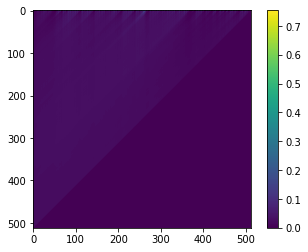

In [164]:
plt.imshow(scape[0])
plt.colorbar()

In [72]:

fitness

tensor([1.1797e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09, 1.3196e-09, 1.0000e-09,
        1.0000e-09, 1.0000e-09, 1.1852e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09,
        1.1082e-09, 1.0000e-09, 1.1558e-09, 1.0000e-09, 1.0579e-09, 1.0000e-09,
        1.2488e-09, 1.0000e-09, 1.0579e-09, 1.0000e-09, 1.0579e-09, 1.0000e-09,
        1.0000e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09, 1.1690e-09, 1.0000e-09,
        1.0000e-09, 1.0000e-09, 1.2367e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09,
        1.2133e-09, 1.0000e-09, 1.2367e-09, 1.0000e-09, 1.1558e-09, 1.0000e-09,
        1.3230e-09, 1.0000e-09, 1.1797e-09, 1.0000e-09, 1.1879e-09, 1.0000e-09,
        1.1082e-09, 1.0000e-09, 1.0847e-09, 1.0000e-09, 1.2488e-09, 1.0000e-09,
        1.2427e-09, 1.0000e-09, 1.2488e-09, 1.0000e-09, 1.2488e-09, 1.0000e-09,
        1.2488e-09, 1.0000e-09, 1.1558e-09, 1.0000e-09, 1.1852e-09, 1.0000e-09,
        1.0000e-09, 1.0000e-09, 1.0779e-09, 1.0000e-09, 1.1253e-09, 1.0000e-09,
        1.0579e-09, 1.0000e-09, 1.1253e-